In [1]:
import torch
import numpy as np
from PIL import Image
import numpy.ma as ma
import torch.utils.data as data
import copy
from torchvision import transforms
import scipy.io as scio
import torchvision.datasets as dset
import random
import scipy.misc
import scipy.io as scio
import os
from PIL import ImageEnhance
from PIL import ImageFilter
import PIL
import matplotlib.pyplot as plt

In [2]:
backfile = open('background/backgrounds.txt')
back_list = []

In [3]:
while 1:
            input_line = backfile.readline()
            if not input_line:
                break
            if input_line[-1:] == '\n':
                input_line = input_line[:-1]
                back_list.append(copy.deepcopy(input_line))

In [25]:

label = np.array(Image.open('{0}/{1}/segmentation0000.png'.format('mini_dataset_vima', "0003")))
rgb = Image.open('{0}/{1}/Image0000.png'.format('mini_dataset_vima', '0003')).convert("RGB")
rgb = ImageEnhance.Brightness(rgb).enhance(1.5).filter(ImageFilter.GaussianBlur(radius=0.8))
            
seed = random.randint(0, 10)
back = Image.open('background/{0}'.format(back_list[seed]))
back = back.resize((640, 640), PIL.Image.LANCZOS)
crop_size = (640,480)
left = random.randint(0, 640 - crop_size[0])
top = random.randint(0, 640 - crop_size[1])
right = left + crop_size[0]
bottom = top + crop_size[1]
back = np.array(back.crop((left, top, right, bottom)))
   
mask = ma.getmaskarray(ma.masked_equal(label, 0))[np.newaxis, :, :]
back = np.transpose(back, (2, 0, 1))
rgb = np.transpose(rgb, (2, 0, 1))
rgb = back * mask + rgb * (1 - mask)
print(rgb.shape)
rgb = np.transpose(rgb, (1, 2, 0))


(3, 480, 640)


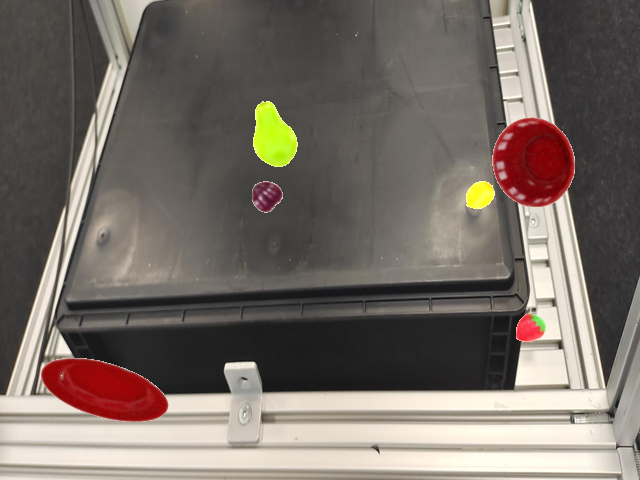

In [26]:
rgb = rgb.astype(np.uint8)
pil_rgb = Image.fromarray(rgb)
display(pil_rgb)

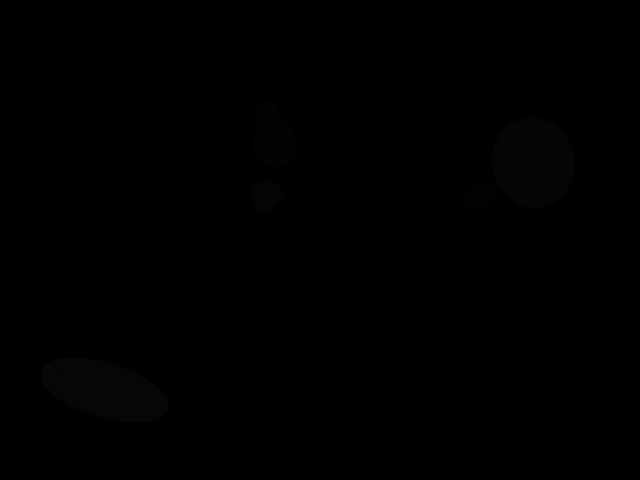

In [17]:
label = label.astype(np.uint8)
pil_label = Image.fromarray(label)
display(pil_label)

In [ ]:

from segnet import SegNet as segnet
checkpoint = torch.load('checkpoints/model_39_0.11677467995788902.pth')	# 加载模型
model = segnet()
params=model.state_dict()


for k,v in params.items():
    print(k) #打印网络中的变量名

	